# Accelerated Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create the least square problem

Here we generate the data $A$ and $b$, and our optimization problem simply is,
$$
\min_x~~\frac{1}{2}\|Ax - b\|^2.
$$
Specifically, we want $A$ to be ill-conditioned so that the gradient descent will have a hard time converging.

In [2]:
np.random.seed(123)
m = 2
n = 2
k = 5.0
#
A = np.random.randn(m,n)
U,S,V = np.linalg.svd(A)
S[0] = k
S[1] = 1.0
A = U @ np.diag(S) @ V.T
#
xt = np.random.randn(n)
b = A.dot(xt)

In [3]:
def func(x):
    r = A.dot(x) - b
    return 0.5*np.sum(r**2)

def grad(x):
    r = A.dot(x) - b
    return A.T.dot(r)

In [4]:
x1min = xt[0] - 1.0
x1max = xt[0] + 1.0
x2min = xt[1] - 1.0
x2max = xt[1] + 1.0
#
N  = 200
x1 = np.linspace(x1min, x1max, N)
x2 = np.linspace(x2min, x2max, N)
#
X1, X2 = np.meshgrid(x1, x2)
#
X = np.empty((N,N,2))
X[:,:,0] = X1
X[:,:,1] = X2
#
Y = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        Y[i,j] = func(X[i,j,:])

(-1.5786002519685365,
 0.42139974803146363,
 0.6514365370971511,
 2.651436537097151)

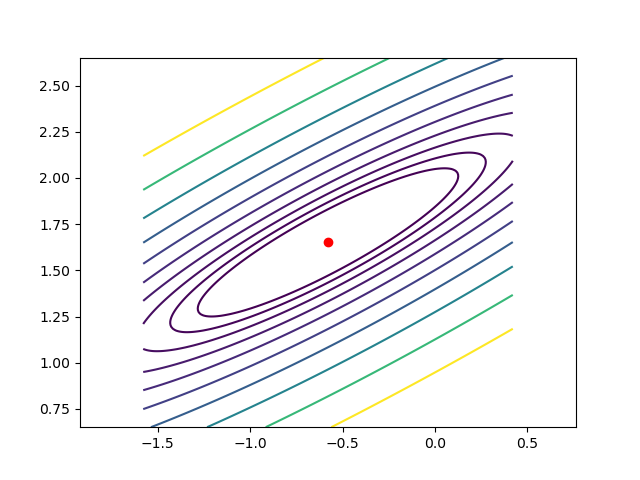

In [5]:
plt.contour(X1, X2, Y, np.logspace(-0.5, 1.0, 10))
plt.plot(xt[0], xt[1], 'or')
plt.axis('equal')

## Gradient descent

$$
x^+ = x - \frac{1}{\beta}\nabla f(x)
$$

In [6]:
beta = k**2
x_gd = np.array([[x1min, x2min]])
#
plt.contour(X1, X2, Y, np.logspace(-0.5, 1.0, 10))
plt.plot(xt[0], xt[1], 'or')
plt.axis('equal')
#
plt.plot(x_gd[:,0], x_gd[:,1], '.b')

In [7]:
beta

25.0

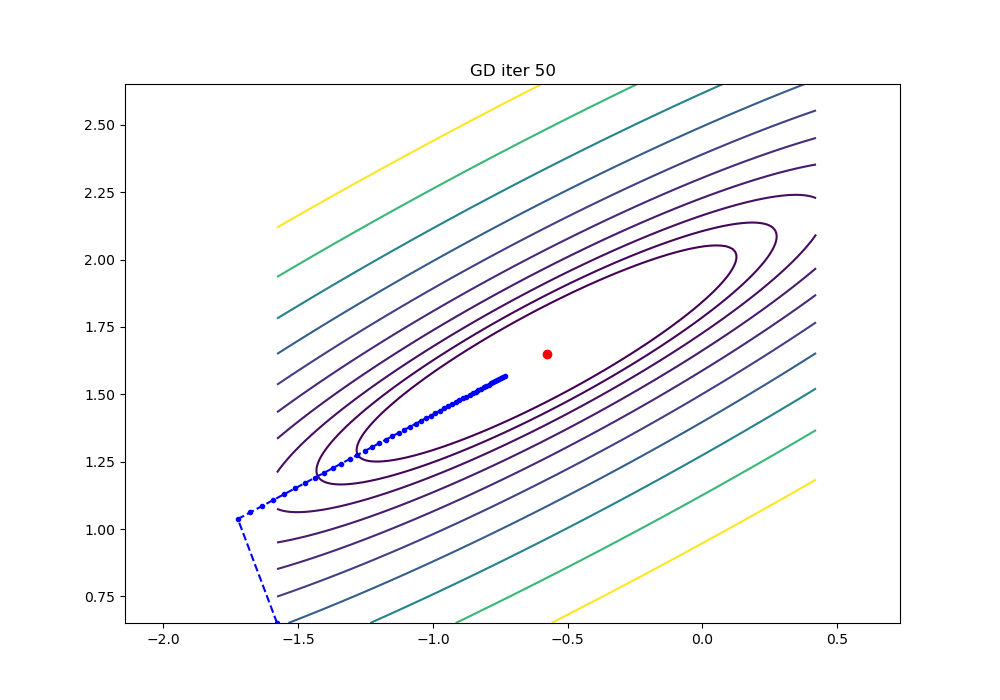

In [8]:
fig = plt.figure(figsize=(10,7))
for iter_gd in range(50):
    x_plus = x_gd[-1] - grad(x_gd[-1])/beta
    x_gd = np.vstack((x_gd, x_plus))
    #
    fig.clf()
    ax = fig.add_subplot(1,1,1)
    ax.contour(X1, X2, Y, np.logspace(-0.5, 1.0, 10))
    ax.plot(xt[0], xt[1], 'or')
    ax.axis('equal')
    #
    ax.plot(x_gd[:,0], x_gd[:,1], '--.b')
    ax.set_title('GD iter %i' % (iter_gd+1))

## Accelerated gradient descent

Initialize $x$, $y=x$, $t=1$, and iterate
$$\begin{aligned}
x^+ &= y - \frac{1}{\beta}\nabla f(y)\\
t^+ &= \frac{1 + \sqrt{1 + 4t^2}}{2}\\
y^+ &= x^+ + \frac{t - 1}{t^+}(x^+ - x)
\end{aligned}$$

In [9]:
beta = k**2
x_agd = np.array([[x1min, x2min]])
y_agd = x_agd.copy()
t_agd = np.array([1.0])
#
plt.contour(X1, X2, Y, np.logspace(-0.5, 1.0, 10))
plt.plot(xt[0], xt[1], 'or')
plt.axis('equal')
#
plt.plot(x_agd[:,0], x_agd[:,1], '.b')
plt.plot(y_agd[:,0], y_agd[:,1], '.g')
#
iter_agd = 0

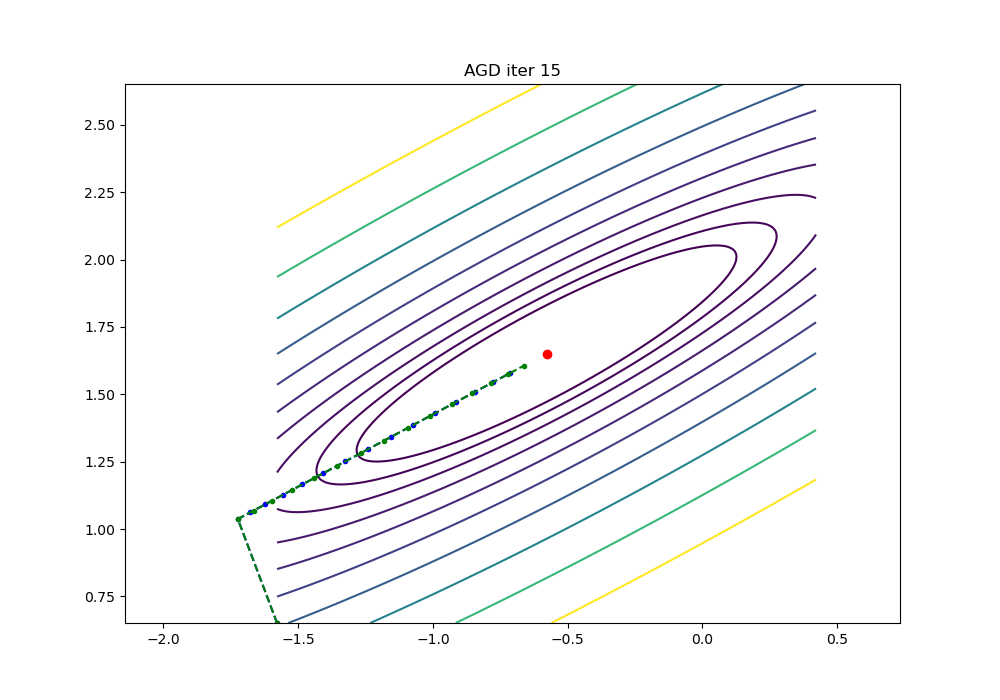

In [10]:
fig = plt.figure(figsize=(10,7))
for iter_agd in range(15):
    x_plus = y_agd[-1] - grad(y_agd[-1])/beta
    t_plus = 0.5*(1.0 + np.sqrt(1.0 + 4.0*t_agd[-1]**2))
    y_plus = x_plus + (t_agd[-1] - 1.0)/t_plus*(x_plus - x_agd[-1])
    #
    x_agd = np.vstack((x_agd, x_plus))
    y_agd = np.vstack((y_agd, y_plus))
    t_agd = np.hstack((t_agd, t_plus))
    #
    fig.clf()
    ax = fig.add_subplot(1,1,1)
    ax.contour(X1, X2, Y, np.logspace(-0.5, 1.0, 10))
    ax.plot(xt[0], xt[1], 'or')
    ax.axis('equal')
    #
    ax.plot(x_agd[:,0], x_agd[:,1], '--.b')
    ax.plot(y_agd[:,0], y_agd[:,1], '--.g')
    #
    ax.set_title('AGD iter %i' % (iter_agd+1))